In [3]:
import pandas as pd 
file_path = "McDonalds_Financial_Statements.csv" 
df = pd.read_csv(file_path) 

print("Dataset Preview:")
display(df.head())

📊 Dataset Preview:


,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


In [5]:
# Check data types
print("Data Types:")
print(df.dtypes)

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Look at summary stats
print("\n Summary Statistics:")
display(df.describe())

Data Types:
Year                                     int64
Market cap ($B)                        float64
Revenue ($B)                           float64
Earnings ($B)                          float64
P/E ratio                              float64
P/S ratio                              float64
P/B ratio                              float64
Operating Margin (%)                   float64
EPS ($)                                float64
Shares Outstanding ($B)                float64
Cash on Hand ($B)                      float64
Dividend Yield (%)                     float64
Dividend (stock split adjusted) ($)    float64
Net assets ($B)                        float64
Total assets ($B)                      float64
Total debt ($B)                        float64
Total liabilities ($B)                 float64
dtype: object

 Missing Values:
Year                                   0
Market cap ($B)                        0
Revenue ($B)                           0
Earnings ($B)                     

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2012.000000,96.824286,22.706190,6.214762,21.661905,4.234762,-7.100000,26.889048,4.852857,0.994762,2.387619,2.487143,2.754286,7.217143,35.016190,21.286190,27.793810
std,6.204837,50.396346,3.398316,2.226166,5.541974,2.266896,19.356029,8.355580,2.507501,0.200714,1.639948,0.575518,1.679874,9.489797,8.715523,14.922204,16.800857
min,2002.000000,20.390000,15.400000,1.660000,15.000000,1.320000,-45.900000,10.790000,0.700000,0.730000,0.330000,1.460000,0.240000,-8.220000,23.970000,8.430000,13.540000
25%,2007.000000,67.220000,20.810000,3.880000,16.500000,2.950000,-20.400000,19.300000,2.880000,0.790000,1.370000,2.150000,1.500000,-3.270000,29.390000,10.140000,14.840000
50%,2012.000000,90.220000,22.820000,6.860000,21.400000,3.360000,2.870000,28.520000,4.880000,1.000000,2.130000,2.390000,2.870000,12.850000,32.810000,13.630000,20.090000
75%,2017.000000,136.210000,24.620000,8.010000,24.800000,6.010000,5.530000,31.970000,6.350000,1.180000,2.580000,2.940000,3.830000,14.630000,36.620000,29.530000,37.070000
max,2022.000000,200.310000,28.100000,9.120000,33.800000,8.630000,15.100000,39.310000,10.110000,1.270000,7.680000,3.500000,5.660000,16.000000,53.600000,48.640000,60.450000


In [7]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [11]:
# Remove $ and commas if present, and convert to numeric
for col in df.columns[1:]:  # Skip 'year'
    df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

In [13]:
# Identify negative values in normally-positive metrics
cols_to_check = ['market_cap_$b', 'revenue_$b', 'earnings_$b', 'total_assets_$b', 'total_liabilities_$b']

for col in cols_to_check:
    neg_vals = df[df[col] < 0]
    if not neg_vals.empty:
        print(f"\n Negative values found in {col}:")
        display(neg_vals[[col, 'year']])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

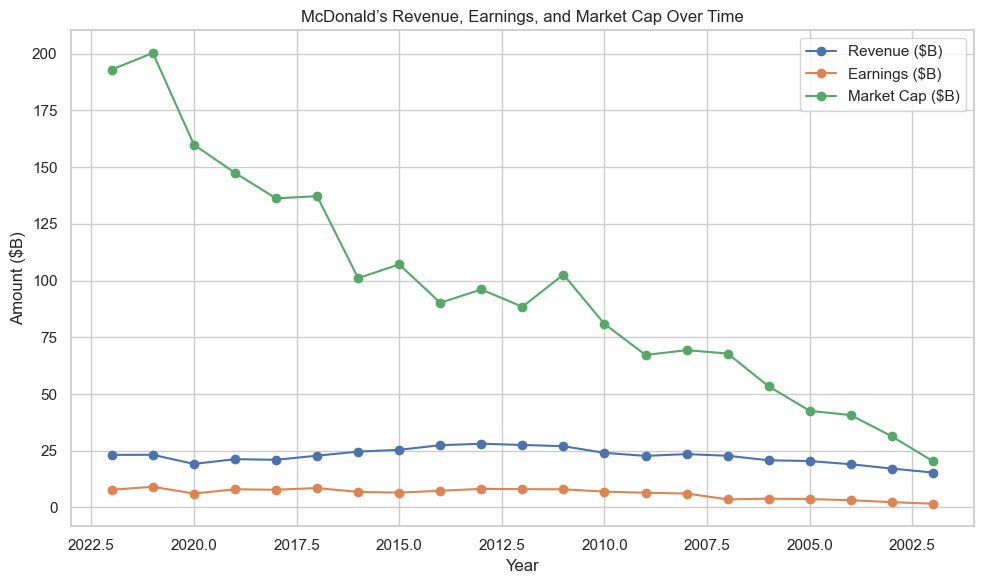

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['revenue_$b'], label='Revenue ($B)', marker='o')
plt.plot(df['year'], df['earnings_$b'], label='Earnings ($B)', marker='o')
plt.plot(df['year'], df['market_cap_$b'], label='Market Cap ($B)', marker='o')
plt.gca().invert_xaxis()  # Most recent year on the left
plt.title('McDonald’s Revenue, Earnings, and Market Cap Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($B)')
plt.legend()
plt.tight_layout()
plt.show()

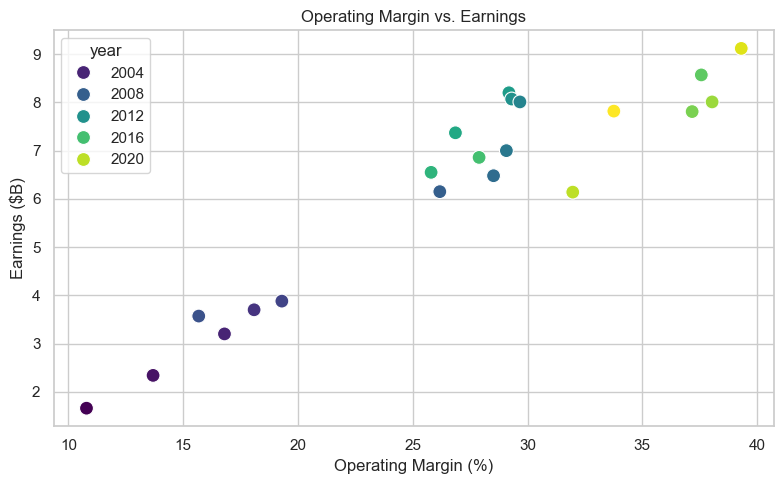

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='operating_margin_%', y='earnings_$b', hue='year', palette='viridis', s=100)
plt.title('Operating Margin vs. Earnings')
plt.xlabel('Operating Margin (%)')
plt.ylabel('Earnings ($B)')
plt.tight_layout()
plt.show()

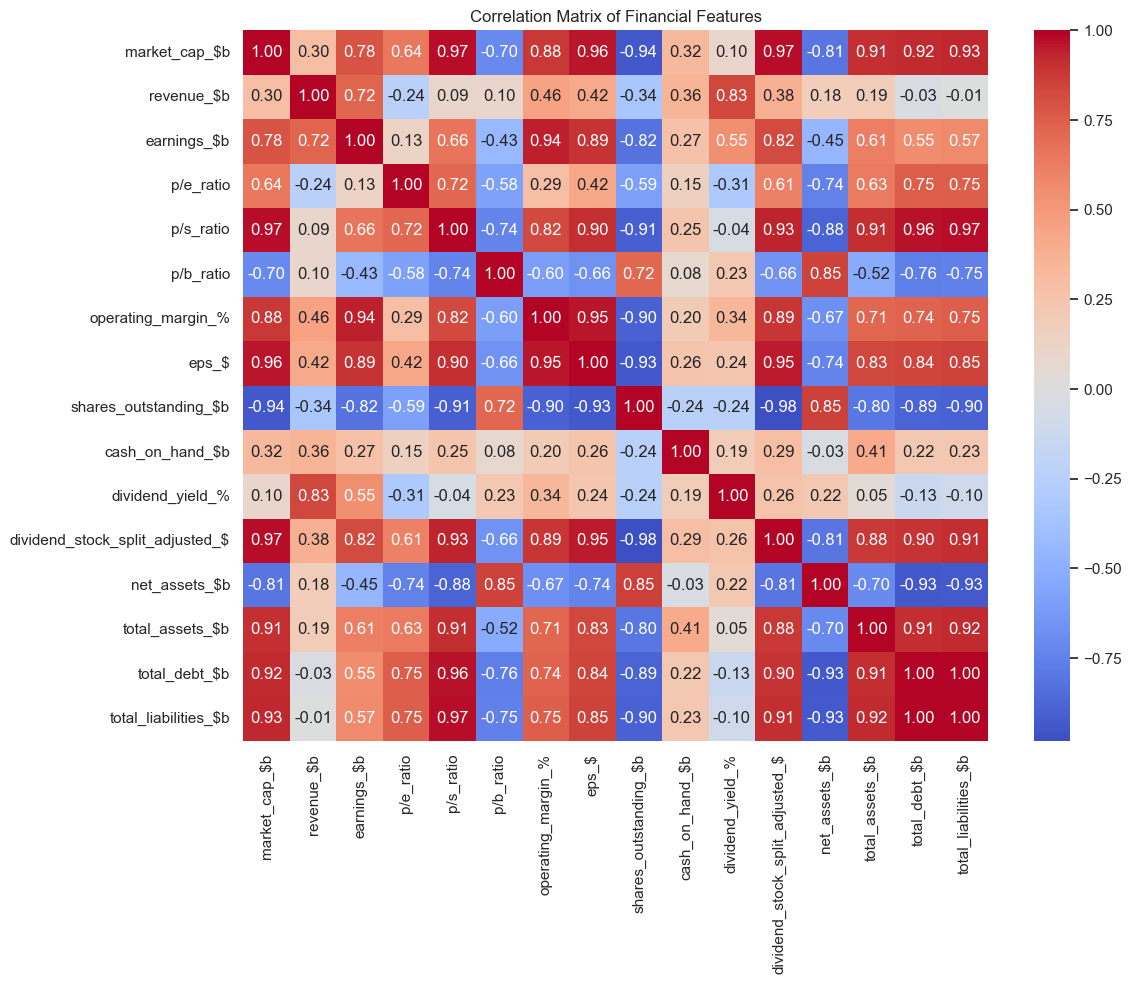

In [21]:
plt.figure(figsize=(12, 10))
corr = df.drop(columns='year').corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Financial Features')
plt.tight_layout()
plt.show()

In [23]:
# Drop non-predictive or target-related columns
df_model = df.drop(columns=['market_cap_$b', 'year'])  # drop target & time

# Features (X) and target (y)
X = df_model
y = df['market_cap_$b']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 100898.49272917645
R-squared Score: -22.6045197465094


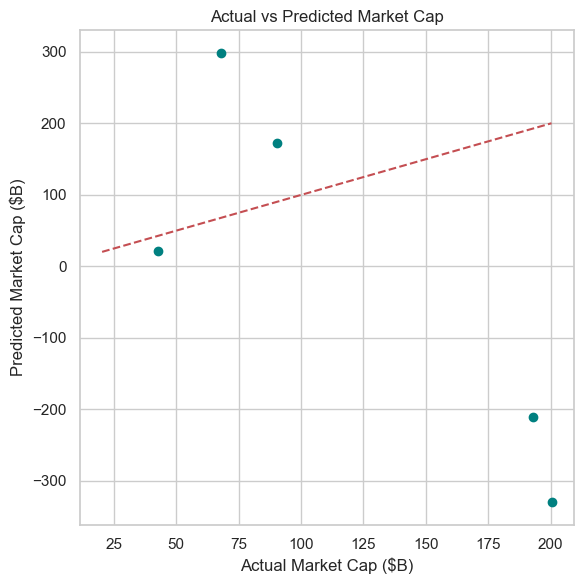

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # identity line
plt.xlabel('Actual Market Cap ($B)')
plt.ylabel('Predicted Market Cap ($B)')
plt.title('Actual vs Predicted Market Cap')
plt.tight_layout()
plt.show()

In [31]:
!pip install streamlit